## Colocalization Analysis for Cell-cell interactions Tutorial (COR2COL)
In this tutorial, we delve into a publicly accessible Visium dataset from 10X Genomics, focusing on the human lymph node. Our approach integrates single-cell RNA sequencing (scRNA-seq) datasets from human secondary lymphoid organs to identify a variety of cell types. By achieving co-localization for each pair of cell types, we introduce a new dimension to understanding their spatial distribution, frequency, and interaction intensity. This analysis not only sheds light on the subtle dynamics of cellular behavior but also enhances our exploration of how cells operate within their environments. Furthermore, this methodology employs a robust test for assessing the correlation coefficients of spatial distributions between two cell types. This provides researchers with deeper insights into cellular behaviors and tissue structures, laying a solid groundwork for the investigation of complex intercellular relationships.

## Contents
* [Run Cell2location package to deconvolute](#Run-Cell2location-package-to-deconvolute)
* [Export deconvolution results](#Export-deconvolution-results)
* [Integrate the cell abundance information with slide coordinate information](#Integrate-the-cell-abundance-information-with-slide-coordinate-information)
*[Visualization (Optional)](#Visualization-(Optional))
*[Get the KL-Divergence value for each pair of cell type](#Get-the-KL-Divergence-value-for-each-pair-of-cell-type)
*[Visualization of KL-Divergence results (Optimal)](#Visualization-of-KL-Divergence-results-(Optimal))
*[Set threshold](#Set-threshold)
*[Visualization of the selected KL_Divergence values (Optimal)](#Visualization-of-the-selected-KL_Divergence-values-(Optimal))
*[Calculate the p-value for each KL_Divergence values](#Calculate-the-p-value-for-each-KL_Divergence-values)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ANhrbwYn9lfETuuDI3tjqRaim54Fksjf)

##Run Cell2location package to deconvolute
 Cell2location is an independent package, but is powered by scvi-tools. If you have questions about cell2location, Visium data or scvi-tools please visit https://discourse.scverse.org/c/ecosytem/cell2location/42, https://discourse.scverse.org/c/general/visium/32 or https://discourse.scverse.org/c/help/scvi-tools/7 correspondingly.

##Export deconvolution results
 Please Run the 'Cell2location' package (https://github.com/BayraktarLab/cell2location) until the Step of ''Exporting estimated posterior distributions of cell abundance and saving results'' before the following analysis.

In [ ]:
# Get the deconvolution results from Cell2location and save to a csv file.
import pandas as pd
cell_abundance = adata_vis.obsm['cell_abundance']
print(cell_abundance)
cell_abundance.to_csv('/content/Visium_Deconvolution.csv', index=True)

Download the 'tissue_positions_list.csv' to the current file folder

In [ ]:
# Read the CSV files into DataFrames
Visium_Deconvolution = pd.read_csv('/content/Visium_Deconvolution.csv')
tissue_positions = pd.read_csv('/content/tissue_positions_list.csv')
tissue_positions.columns = ['Bar_code', 'Tissue_cover','X','Y','Pixel_X','Pixcle_Y']
Visium_Deconvolution.head()

,Bar_code,meanscell_abundance_w_sf_B_Cycling,meanscell_abundance_w_sf_B_GC_DZ,meanscell_abundance_w_sf_B_GC_LZ,meanscell_abundance_w_sf_B_GC_prePB,meanscell_abundance_w_sf_B_IFN,meanscell_abundance_w_sf_B_activated,meanscell_abundance_w_sf_B_mem,meanscell_abundance_w_sf_B_naive,meanscell_abundance_w_sf_B_plasma,...,meanscell_abundance_w_sf_T_CD4+_TfH,meanscell_abundance_w_sf_T_CD4+_TfH_GC,meanscell_abundance_w_sf_T_CD4+_naive,meanscell_abundance_w_sf_T_CD8+_CD161+,meanscell_abundance_w_sf_T_CD8+_cytotoxic,meanscell_abundance_w_sf_T_CD8+_naive,meanscell_abundance_w_sf_T_TIM3+,meanscell_abundance_w_sf_T_TfR,meanscell_abundance_w_sf_T_Treg,meanscell_abundance_w_sf_VSMC
0,AAACAAGTATCTCCCA-1,0.927453,0.508365,0.464095,0.117892,0.535612,4.332800,3.370269,5.963846,3.451809,...,1.060615,0.584356,3.230192,0.835689,1.104667,1.351368,2.310894,0.588497,0.874894,1.015284
1,AAACAATCTACTAGCA-1,1.231619,0.308842,0.242730,0.445151,1.133384,0.292507,1.386740,0.223281,0.550227,...,1.210414,0.879056,29.095404,1.014037,1.271615,5.012199,2.084246,2.867727,3.752712,1.263324
2,AAACACCAATAACTGC-1,1.201485,0.412287,0.579233,0.188800,0.516353,3.653218,5.065006,5.826949,1.916521,...,0.745801,0.862920,2.498966,0.757438,1.270050,1.081630,3.358245,0.646968,0.727041,1.200533
3,AAACAGAGCGACTCCT-1,1.087422,0.188857,0.229295,0.082438,19.469004,0.095093,0.091605,0.061158,0.385915,...,1.088332,0.159301,2.951998,0.696540,1.102271,0.736459,3.337719,1.270965,1.009076,0.501017
4,AAACAGCTTTCAGAAG-1,0.446719,0.396050,0.620853,0.195836,0.706438,3.944923,14.648079,20.260054,0.727420,...,0.450883,1.598441,2.602316,0.355072,0.543051,0.746688,1.120928,0.601101,0.632171,0.395827


In [ ]:
tissue_positions.head()

,Bar_code,Tissue_cover,X,Y,Pixel_X,Pixcle_Y
0,TACCGATCCAACACTT-1,0,1,1,1130,1379
1,ATTAAAGCGGACGAGC-1,0,0,2,1010,1447
2,GATAAGGGACGATTAG-1,0,1,3,1130,1516
3,GTGCAAATCACCAATA-1,0,0,4,1010,1585
4,TGTTGGCTGGCGGAAG-1,0,1,5,1129,1654


##Integrate the cell abundance information with slide coordinate information
Merge the Visium_Deconvolution and tissue_positions Dataframe to get the the analysis input file (Cell abundance of each cell type with coordinate information)

In [ ]:
# Merge the two dataframes
Cell_Composition_PerSpot_Coordinate = pd.merge(Visium_Deconvolution, tissue_positions, on='Bar_code', how='inner')
Cell_Composition_PerSpot_Coordinate.head()

In [ ]:
# Save the data frame as a CSV file
Cell_Composition_PerSpot_Coordinate.to_csv('Cell_Composition_PerSpot_Coordinate.csv', index=False)

In [ ]:
df = pd.read_csv('/content/Cell_Composition_PerSpot_Coordinate.csv')

##Visualization (Optional)
Visualize the cell abundance surface of each cell type over the X-Y coordinate plane.

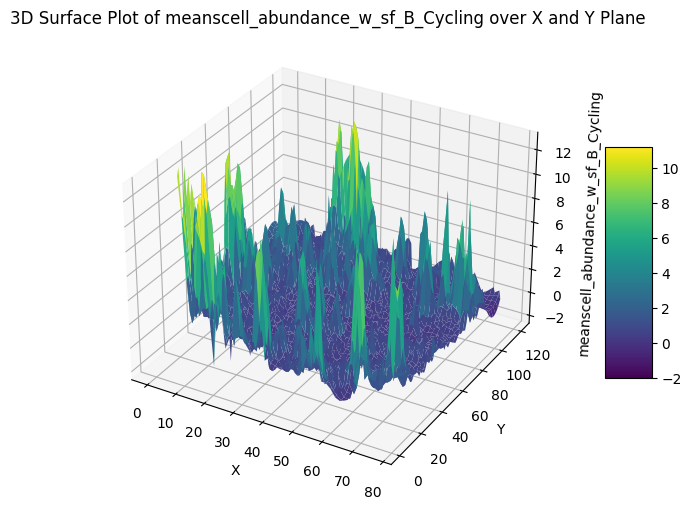

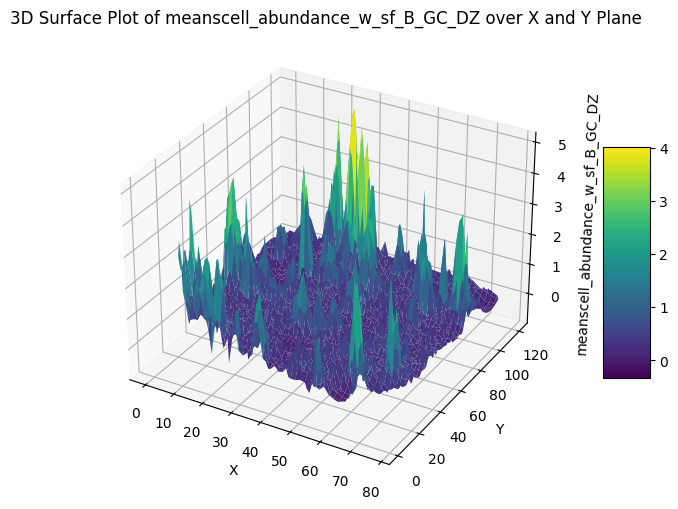

In [ ]:
from scipy.interpolate import griddata

# Define the surface plot function
def plot_3d_surface(df, x, y, z):
    # Creating a grid
    xi = np.linspace(df[x].min(), df[x].max(), 100)
    yi = np.linspace(df[y].min(), df[y].max(), 100)
    xi, yi = np.meshgrid(xi, yi)

    # Interpolating z values on the grid
    zi = griddata((df[x], df[y]), df[z], (xi, yi), method='cubic')

    # Plotting
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')
    surface = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel(z)
    fig.colorbar(surface, shrink=0.5, aspect=5)
    plt.title(f'3D Surface Plot of {z} over {x} and {y} Plane')
    plt.show()

# Plotting the surface for 'meanscell_abundance_w_sf_B_Cycling'
plot_3d_surface(df, 'X', 'Y', 'meanscell_abundance_w_sf_B_Cycling')

# Plotting the surface for 'meanscell_abundance_w_sf_B_GC_DZ'
plot_3d_surface(df, 'X', 'Y', 'meanscell_abundance_w_sf_B_GC_DZ')


##Get the KL-Divergence value for each pair of cell type
First plot the cell abundance surface for each cell type over the X-Y coordinate plane, then calculate the KL-Divergence for each pair of these surfaces.

In [ ]:
from itertools import combinations

# Identify all columns starting with 'meanscell_abundance_w_sf'
columns_of_interest = [col for col in df.columns if col.startswith('meanscell_abundance_w_sf')]

# Generate all possible pairs of these columns
column_pairs = list(combinations(columns_of_interest, 2))

# Initialize a list to hold the KL-Divergence results
kl_divergences = []

# Calculate the KL-Divergence for each pair
for col1, col2 in column_pairs:
    # Create 2D histograms for each variable
    hist1, _, _ = np.histogram2d(df['X'], df['Y'], bins=[x_edges, y_edges], weights=df[col1])
    hist2, _, _ = np.histogram2d(df['X'], df['Y'], bins=[x_edges, y_edges], weights=df[col2])

    # Normalize the histograms to get probability distributions
    prob1 = hist1 / hist1.sum()
    prob2 = hist2 / hist2.sum()

    # Replace zeros to avoid division by zero or log of zero in KL Divergence calculation
    prob1 += 1e-12
    prob2 += 1e-12

    # Calculate the KL Divergence
    kl_div = entropy(prob1.ravel(), prob2.ravel())

    # Store the results
    kl_divergences.append({
        'Column 1': col1,
        'Column 2': col2,
        'KL-Divergence': kl_div
    })

# Convert the results to a DataFrame
kl_divergences_df = pd.DataFrame(kl_divergences)

# Save the DataFrame to a CSV file
kl_divergences_df.to_csv('kl_divergences.csv', index=False)

kl_divergences_df.head()


,Column 1,Column 2,KL-Divergence
0,meanscell_abundance_w_sf_B_Cycling,meanscell_abundance_w_sf_B_GC_DZ,0.161677
1,meanscell_abundance_w_sf_B_Cycling,meanscell_abundance_w_sf_B_GC_LZ,0.252471
2,meanscell_abundance_w_sf_B_Cycling,meanscell_abundance_w_sf_B_GC_prePB,0.256277
3,meanscell_abundance_w_sf_B_Cycling,meanscell_abundance_w_sf_B_IFN,0.791466
4,meanscell_abundance_w_sf_B_Cycling,meanscell_abundance_w_sf_B_activated,0.910604


In [ ]:
kl_divergences_df

,Column 1,Column 2,KL-Divergence
0,meanscell_abundance_w_sf_B_Cycling,meanscell_abundance_w_sf_B_GC_DZ,0.161677
1,meanscell_abundance_w_sf_B_Cycling,meanscell_abundance_w_sf_B_GC_LZ,0.252471
2,meanscell_abundance_w_sf_B_Cycling,meanscell_abundance_w_sf_B_GC_prePB,0.256277
3,meanscell_abundance_w_sf_B_Cycling,meanscell_abundance_w_sf_B_IFN,0.791466
4,meanscell_abundance_w_sf_B_Cycling,meanscell_abundance_w_sf_B_activated,0.910604
...,...,...,...
556,meanscell_abundance_w_sf_T_TIM3+,meanscell_abundance_w_sf_T_Treg,0.201324
557,meanscell_abundance_w_sf_T_TIM3+,meanscell_abundance_w_sf_VSMC,0.131063
558,meanscell_abundance_w_sf_T_TfR,meanscell_abundance_w_sf_T_Treg,0.038528
559,meanscell_abundance_w_sf_T_TfR,meanscell_abundance_w_sf_VSMC,0.200196


## Visualization of KL-Divergence results (Optimal)

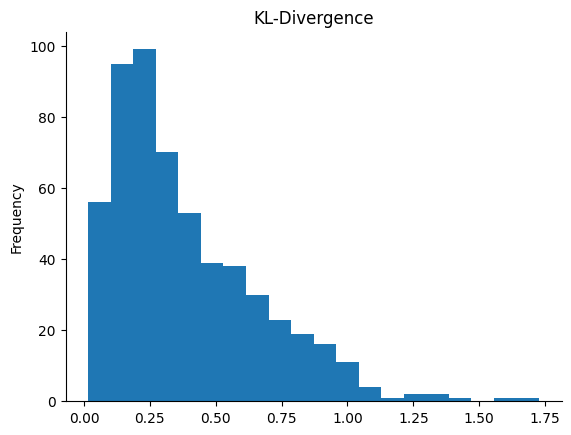

In [ ]:
# @title KL-Divergence

from matplotlib import pyplot as plt
kl_divergences_df['KL-Divergence'].plot(kind='hist', bins=20, title='KL-Divergence')
plt.gca().spines[['top', 'right',]].set_visible(False)

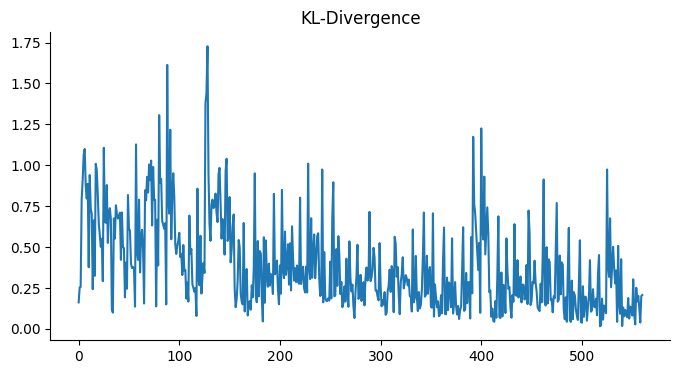

In [ ]:
# @title KL-Divergence

from matplotlib import pyplot as plt
kl_divergences_df['KL-Divergence'].plot(kind='line', figsize=(8, 4), title='KL-Divergence')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#Change the column name of the kl_divergences_df
kl_divergences_df.columns = ['Cell_type_1', 'Cell_type_2','KL_Divergence_value']
kl_divergences_df.head()

,Cell_type_1,Cell_type_2,KL_Divergence_value
0,meanscell_abundance_w_sf_B_Cycling,meanscell_abundance_w_sf_B_GC_DZ,0.161677
1,meanscell_abundance_w_sf_B_Cycling,meanscell_abundance_w_sf_B_GC_LZ,0.252471
2,meanscell_abundance_w_sf_B_Cycling,meanscell_abundance_w_sf_B_GC_prePB,0.256277
3,meanscell_abundance_w_sf_B_Cycling,meanscell_abundance_w_sf_B_IFN,0.791466
4,meanscell_abundance_w_sf_B_Cycling,meanscell_abundance_w_sf_B_activated,0.910604


## Set threshold
Set a threshold of 0.05 to get the potential correlated cell types for statistical analysis-calculate the p-value of these selected kl_divergence

In [ ]:
# Select the data with KL-Divergence < 0.05
filtered_kl_divergences_df = kl_divergences_df[kl_divergences_df['KL_Divergence_value'] < 0.05]

filtered_kl_divergences_df

,Cell_type_1,Cell_type_2,KL_Divergence_value
183,meanscell_abundance_w_sf_B_mem,meanscell_abundance_w_sf_B_naive,0.045738
412,meanscell_abundance_w_sf_ILC,meanscell_abundance_w_sf_NK,0.048360
413,meanscell_abundance_w_sf_ILC,meanscell_abundance_w_sf_NKT,0.043190
485,meanscell_abundance_w_sf_NK,meanscell_abundance_w_sf_T_CD4+_TfH,0.043317
489,meanscell_abundance_w_sf_NK,meanscell_abundance_w_sf_T_CD8+_cytotoxic,0.042571
499,meanscell_abundance_w_sf_NKT,meanscell_abundance_w_sf_T_CD8+_CD161+,0.042609
500,meanscell_abundance_w_sf_NKT,meanscell_abundance_w_sf_T_CD8+_cytotoxic,0.037506
505,meanscell_abundance_w_sf_NKT,meanscell_abundance_w_sf_VSMC,0.049880
518,meanscell_abundance_w_sf_T_CD4+_TfH,meanscell_abundance_w_sf_T_CD8+_CD161+,0.015767
519,meanscell_abundance_w_sf_T_CD4+_TfH,meanscell_abundance_w_sf_T_CD8+_cytotoxic,0.022140


## Visualization of the selected KL_Divergence values (Optimal)

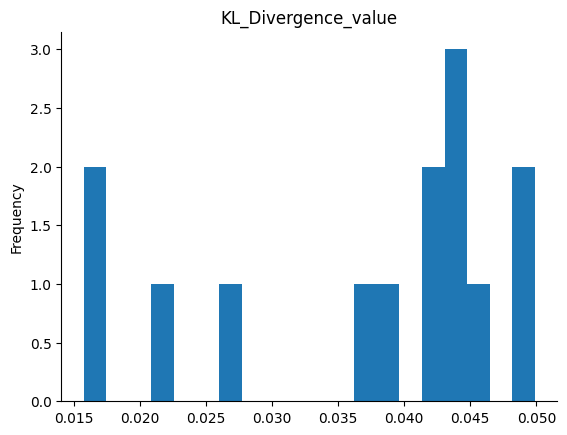

In [ ]:
# @title KL_Divergence_value

from matplotlib import pyplot as plt
filtered_kl_divergences_df['KL_Divergence_value'].plot(kind='hist', bins=20, title='KL_Divergence_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Cell_type_2', ylabel='Cell_type_1'>

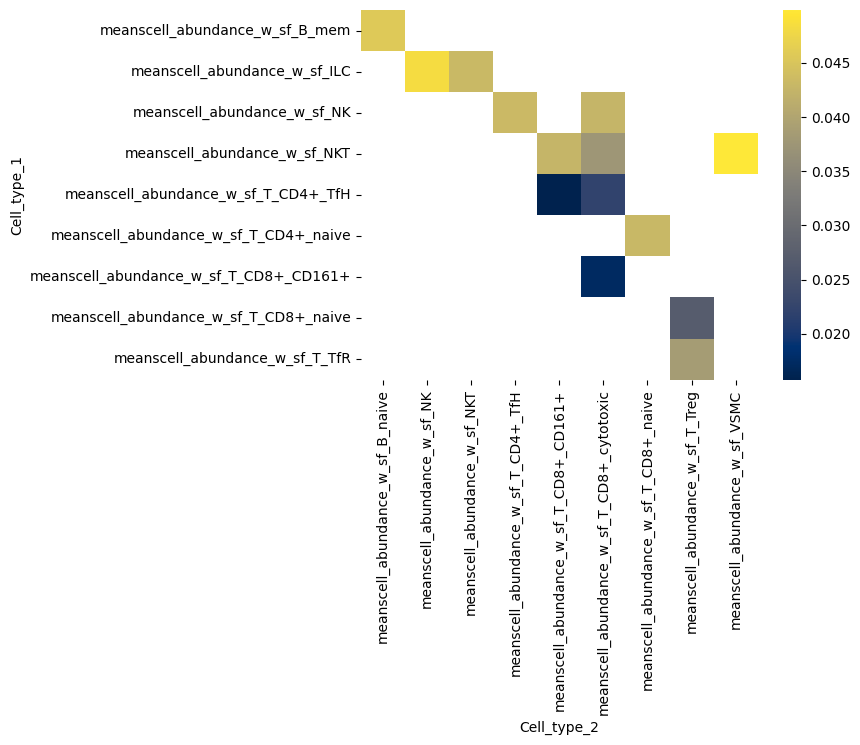

In [ ]:
#@title  KL Divergence Matrix

import seaborn as sns
sns.heatmap(data=filtered_kl_divergences_df.pivot_table(values='KL_Divergence_value', index='Cell_type_1', columns='Cell_type_2'), cmap='cividis')

Save the selected KL_Divergence results to a CSV file

In [ ]:
#Save the selected KL_Divergence results to a CSV file
filtered_kl_divergences_df.to_csv('Correlation_analysis.csv', index=False)

In [ ]:
correlation_analysis_df = pd.read_csv('/content/Correlation_analysis.csv')

## Calculate the p-value for each KL_Divergence values
Shuffle the original cell_abundance distribution for each cell types 10,000 times to get the random distribution and then to calculate the p-value.

In [ ]:

# Re-initialize a list to hold the results
results = []

# Iterate through each pair in the DataFrame
for index, row in correlation_analysis_df.iterrows():
    cell_type_1, cell_type_2, original_kl = row['Cell_type_1'], row['Cell_type_2'], row['KL_Divergence_value']

    # Extract the original content vectors for cellA and cellB
    original_content_a = df[cell_type_1].values.copy()
    original_content_b = df[cell_type_2].values.copy()

    # Shuffle and calculate KL-Divergence 1,000 times
    perm_kl_divergences = []
    for _ in range(10000):
        np.random.shuffle(original_content_a)
        np.random.shuffle(original_content_b)

        # Create 2D histograms for each variable
        hist1, _, _ = np.histogram2d(df['X'], df['Y'], bins=[x_edges, y_edges], weights=original_content_a)
        hist2, _, _ = np.histogram2d(df['X'], df['Y'], bins=[x_edges, y_edges], weights=original_content_b)

        # Normalize the histograms to get probability distributions
        prob1 = hist1 / hist1.sum()
        prob2 = hist2 / hist2.sum()

        # Replace zeros to avoid division by zero or log of zero in KL Divergence calculation
        prob1 += 1e-12
        prob2 += 1e-12

        # Calculate the KL Divergence for the shuffled data
        perm_kl_div = entropy(prob1.ravel(), prob2.ravel())
        perm_kl_divergences.append(perm_kl_div)

    # Compute the corrected p-value: fraction of permuted KLs <= original KL
    p_value_corrected = sum(1 for perm_kl in perm_kl_divergences if perm_kl <= original_kl) / len(perm_kl_divergences)

    # Store the results
    results.append({
        'Cell_type_1': cell_type_1,
        'Cell_type_2': cell_type_2,
        'Original_KL_Divergence': original_kl,
        'Corrected_P_Value': p_value_corrected
    })

# Convert the corrected results to a DataFrame
results_df = pd.DataFrame(results)

# Display the first few rows of the corrected results DataFrame
results_df.head()


,Cell_type_1,Cell_type_2,Original_KL_Divergence,Corrected_P_Value
0,meanscell_abundance_w_sf_B_mem,meanscell_abundance_w_sf_B_naive,0.045738,0.0
1,meanscell_abundance_w_sf_ILC,meanscell_abundance_w_sf_NK,0.048360,0.0
2,meanscell_abundance_w_sf_ILC,meanscell_abundance_w_sf_NKT,0.043190,0.0
3,meanscell_abundance_w_sf_NK,meanscell_abundance_w_sf_T_CD4+_TfH,0.043317,0.0
4,meanscell_abundance_w_sf_NK,meanscell_abundance_w_sf_T_CD8+_cytotoxic,0.042571,0.0


In [ ]:
results_df

,Cell_type_1,Cell_type_2,Original_KL_Divergence,Corrected_P_Value
0,meanscell_abundance_w_sf_B_mem,meanscell_abundance_w_sf_B_naive,0.045738,0.0
1,meanscell_abundance_w_sf_ILC,meanscell_abundance_w_sf_NK,0.048360,0.0
2,meanscell_abundance_w_sf_ILC,meanscell_abundance_w_sf_NKT,0.043190,0.0
3,meanscell_abundance_w_sf_NK,meanscell_abundance_w_sf_T_CD4+_TfH,0.043317,0.0
4,meanscell_abundance_w_sf_NK,meanscell_abundance_w_sf_T_CD8+_cytotoxic,0.042571,0.0
5,meanscell_abundance_w_sf_NKT,meanscell_abundance_w_sf_T_CD8+_CD161+,0.042609,0.0
6,meanscell_abundance_w_sf_NKT,meanscell_abundance_w_sf_T_CD8+_cytotoxic,0.037506,0.0
7,meanscell_abundance_w_sf_NKT,meanscell_abundance_w_sf_VSMC,0.049880,0.0
8,meanscell_abundance_w_sf_T_CD4+_TfH,meanscell_abundance_w_sf_T_CD8+_CD161+,0.015767,0.0
9,meanscell_abundance_w_sf_T_CD4+_TfH,meanscell_abundance_w_sf_T_CD8+_cytotoxic,0.022140,0.0


<Axes: xlabel='Original_KL_Divergence', ylabel='Corrected_P_Value'>

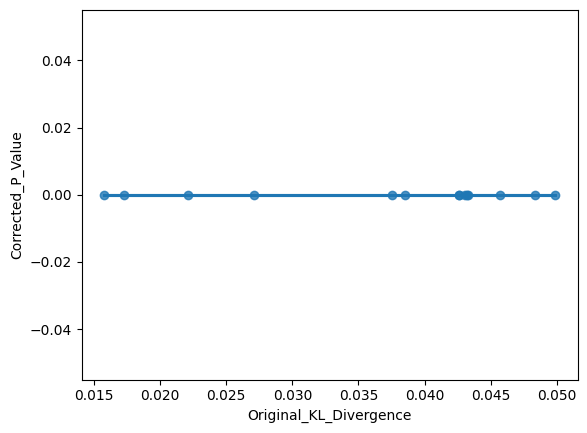

In [ ]:
# @title Correlation between Original KL Divergence and Corrected P Value

sns.regplot(data=corrected_results_df, x="Original_KL_Divergence", y="Corrected_P_Value")


<Axes: xlabel='Original_KL_Divergence', ylabel='Corrected_P_Value'>

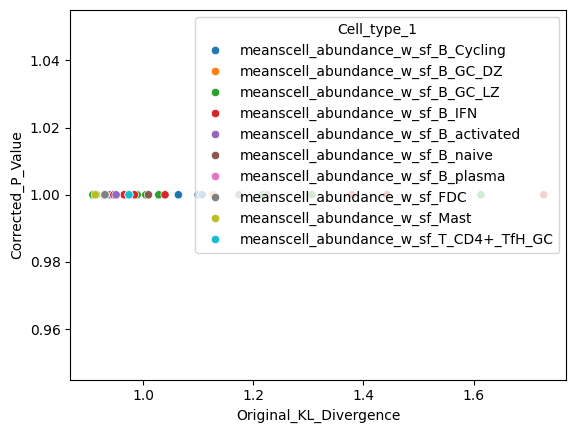

In [ ]:
# @title Original KL Divergence vs Corrected P-Value by Cell Type

sns.scatterplot(data=corrected_results_df, x='Original_KL_Divergence', y='Corrected_P_Value', hue='Cell_type_1')